In [68]:
import numpy as np
import os
import json

frame_dir='/content/drive/MyDrive/posedetection/json_video/'

In [138]:
def GetFrameAngles(posejson, frame = 0):
    # Calculates joint angles, confidence intervals, cross-prodcut sign etc.

    # Load JSON
    #with open(fname) as json_data:
    #    data_all = json.load(json_data)

    ## AQEEL -- Now handled by GetPoseAngle

    # Get first person
    np.seterr(divide='ignore', invalid='ignore')
    data = posejson['people'][0]

    # Get pose keypoints and reshape
    pose_kp_raw = data['pose_keypoints_2d']
    pose_kp = np.array(pose_kp_raw).reshape([18,3])
    
    # Define Joints
    joint_labels=['Right elbow','Left elbow','Right Shoulder','Left Shoulder','Right Knee','Left Knee','Right Hip','Left Hip']
    joints  = [[2,3,4],[5,6,7],[3,2,5],[6,5,2],[8,9,10],[11,12,13],[11,8,9],[8,11,12]]

    # Get array of 3x3 arrays of points from pose_kp corresponding to each joint
    pose_kp_joints = np.array([pose_kp[i,0:2] for i in joints])

    # Define confidence in a joint as quadrature of confidence of each body part
    pose_kp_joints_confidence = np.array([np.sqrt(np.mean(np.square(pose_kp[i,2:3]))) for i in joints])

    # Define vectors with origin at joint
    v1 = pose_kp_joints[:,0,:]-pose_kp_joints[:,1,:]
    v2 = pose_kp_joints[:,2,:]-pose_kp_joints[:,1,:]

    # Compute joint angle
    absProb = np.multiply(np.sqrt(np.sum(np.power(v1,2),axis=1)),np.sqrt(np.sum(np.power(v2,2),axis=1)))
    angles  = np.arccos(np.divide(np.sum(np.multiply(v1,v2),axis=1),absProb))*180/np.pi

    # Compute cross product sign
    angles_sign = np.sign(np.subtract(np.multiply(v1[:,0],v2[:,1]),np.multiply(v1[:,1],v2[:,0])))

    # return {"frame": frame,
    #         "joint_labels": joint_labels,
    #         "angles": angles,
    #         "angles_sign": angles_sign,
    #         "confidence": pose_kp_joints_confidence,
    #         "v1": v1,
    #         "v2": v2,
    #         "pose_kp": pose_kp}
    return angles

In [148]:
joint_angles=np.array([])
for filename in os.listdir(frame_dir):
  filenames.append([filename][0][:-15])

  f = open(frame_dir+filename,)
  data = json.load(f)
  f.close()
  
  joint_angles=np.append(joint_angles,GetFrameAngles(data))
  # print(GetFrameAngles(data))

  

In [149]:
joint_angles=joint_angles.reshape(213,8)

In [150]:
import pandas as pd
joint_labels=['Right elbow','Left elbow','Right Shoulder','Left Shoulder','Right Knee','Left Knee','Right Hip','Left Hip']
df=pd.DataFrame(joint_angles,columns=joint_labels)

In [151]:
df.head()

,Right elbow,Left elbow,Right Shoulder,Left Shoulder,Right Knee,Left Knee,Right Hip,Left Hip
0,178.999247,154.710026,100.394523,101.067538,179.946690,173.239605,87.049042,99.815674
1,178.611280,154.702132,100.413197,101.044727,179.946270,173.226165,89.905396,96.965893
2,178.634961,152.827754,100.416818,101.015398,179.957648,173.070723,89.932134,97.099859
3,178.234491,154.664775,105.294935,94.638220,179.946042,173.075234,89.932313,97.089152
4,179.768653,154.718711,101.080911,96.841755,179.923999,173.067319,89.918986,97.081041


In [152]:
df.to_csv('joint_angles.csv')

Right elbow


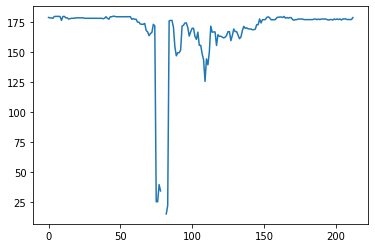

Left elbow


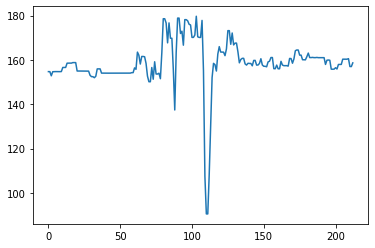

Right Shoulder


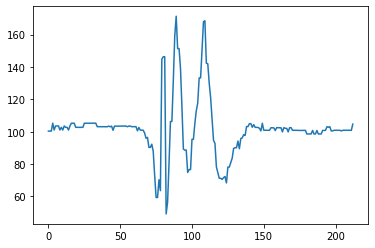

Left Shoulder


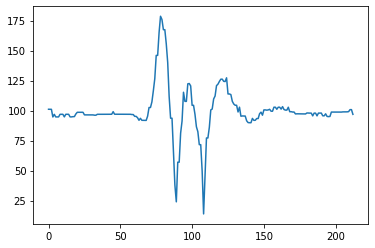

Right Knee


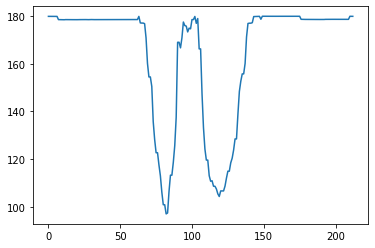

Left Knee


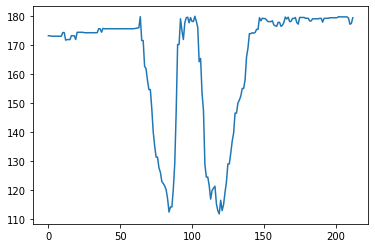

Right Hip


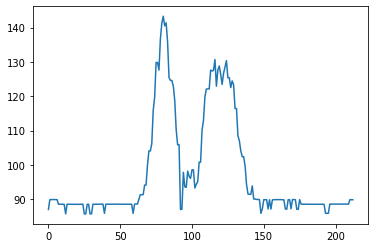

Left Hip


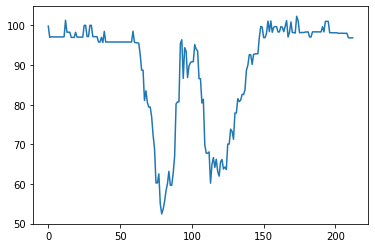

In [153]:
import matplotlib.pyplot as plt

for joints in df.columns:
  print(joints)
  plt.plot(df[joints])
  plt.show()